# Winning Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
wrestling_2013 = '../Resources/WWE-Data-2013.csv'
wrestling_2014 = '../Resources/WWE-Data-2014.csv'
wrestling_2015 = '../Resources/WWE-Data-2015.csv'
wrestling_2016 = '../Resources/WWE-Data-2016.csv'

wrestling_2013_df = pd.read_csv(wrestling_2013)
wrestling_2014_df = pd.read_csv(wrestling_2014)
wrestling_2015_df = pd.read_csv(wrestling_2015)
wrestling_2016_df = pd.read_csv(wrestling_2016)
wrestling_2016_df.head()

,Wrestler,Wins,Losses,Draws
0,Dean Ambrose,133,67,4
1,Kevin Owens,61,130,2
2,Tyler Breeze,17,163,2
3,AJ Styles,108,68,0
4,Sami Zayn,111,59,6


In [3]:
# Start merging and renaming here
combined_df = pd.merge(wrestling_2013_df,wrestling_2014_df,on='Wrestler',how='outer')
combined_df

,Wrestler,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0
...,...,...,...,...,...,...,...
177,Elias Sampson,NaN,NaN,NaN,3.0,21.0,0.0
178,Chad Gable,NaN,NaN,NaN,5.0,17.0,0.0
179,Steve Cutler,NaN,NaN,NaN,4.0,15.0,0.0
180,Dana Brooke,NaN,NaN,NaN,4.0,10.0,0.0


In [4]:
# x to 2013
combined_df = combined_df.rename(columns={'Wins_x':'2013 Wins','Losses_x':'2013 Losses','Draws_x':'2013 Draws'})

# y to 2014
combined_df = combined_df.rename(columns={'Wins_y':'2014 Wins','Losses_y':'2014 Losses','Draws_y':'2014 Draws'})
combined_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [5]:
# merge 2015
combined_df = pd.merge(combined_df,wrestling_2015_df,on='Wrestler',how='outer')
combined_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...
208,Tommy Dreamer,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,1.0
209,Levis Valenzuela Jr.,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0
210,Cassie,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.0,0.0
211,Gionna Daddio,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,0.0


In [6]:
# rename 2015 columns
combined_df = combined_df.rename(columns={'Wins':'2015 Wins','Losses':'2015 Losses','Draws':'2015 Draws'})
combined_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [7]:
# merge 2016
combined_df = pd.merge(combined_df,wrestling_2016_df,on='Wrestler',how='outer')
combined_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Nikki Cross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,0.0
266,Noah Potjes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,10.0,0.0
267,Cezar Bononi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,1.0
268,James Ellsworth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,0.0


In [8]:
# rename 2016 columns
combined_df = combined_df.rename(columns={'Wins':'2016 Wins','Losses':'2016 Losses','Draws':'2016 Draws'})
combined_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


### Part 2 - Time to Calculate!

* When your tables have been merged together into one data frame, calculate the total number of wins, losses, and draws a wrestler has had over the course of their career. Also create a new column that will hold the total matches a wrestler has been in over the course of their career.

    * You will need to convert all NaN values to a number so that you can perform these calculations

* We are only interested in those wrestlers who have been with the WWE from 2013 to 2016. You will need to come up with some way of filtering out rows that do not meet these conditions.
    
    * Also set the 'Wrestler' column as your key for easier referencing later on.

In [9]:
# replace NaN
combined_df = combined_df.fillna(0)
# Calculate total wins, losses, draws, and matches
combined_df['Total Wins']=combined_df['2013 Wins']+combined_df['2014 Wins']+combined_df['2015 Wins']+combined_df['2016 Wins']
combined_df['Total Losses']=combined_df['2013 Losses']+combined_df['2014 Losses']+combined_df['2015 Losses']+combined_df['2016 Losses']
combined_df['Total Draws']=combined_df['2013 Draws']+combined_df['2014 Draws']+combined_df['2015 Draws']+combined_df['2016 Draws']
combined_df['Total Matches']=combined_df['Total Wins']+combined_df['Total Losses']+combined_df['Total Draws']
combined_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Nikki Cross,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,0.0,8.0,5.0,0.0,13.0
266,Noah Potjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,0.0,3.0,10.0,0.0,13.0
267,Cezar Bononi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1.0,1.0,9.0,1.0,11.0
268,James Ellsworth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,8.0,3.0,0.0,11.0


In [11]:
# create df of top wrestlers
top_wrestlers = combined_df.loc[(combined_df['Total Matches']>=100)&
                               (combined_df['2013 Wins']>0)&
                               (combined_df['2016 Wins']>0)]
top_wrestlers = top_wrestlers.set_index('Wrestler')
top_wrestlers

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viktor,6.0,1.0,0.0,51.0,33.0,0.0,19.0,143.0,0.0,2.0,145.0,1.0,78.0,322.0,1.0,401.0
Adam Rose,4.0,1.0,0.0,86.0,21.0,0.0,8.0,142.0,1.0,6.0,23.0,0.0,104.0,187.0,1.0,292.0
Konnor,5.0,0.0,0.0,49.0,29.0,0.0,19.0,141.0,0.0,2.0,110.0,1.0,75.0,280.0,1.0,356.0


### Part 3 - Charting Careers

* Store an individual wrestler's wins over time in a variable
* Store that same wrestler's losses over time in a variable as well
* Create a line chart that will plot this wrestler's wins and losses from 2013 to 2016

In [11]:
# Collect the user's input to search through our data frame
wrestler_name = input('Which wrestler would you like to search for? ')


In [ ]:
# Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
wrestler_wins = top_wrestlers.loc[wrestler_name,['2013 Wins','2014 Wins']]
# Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016


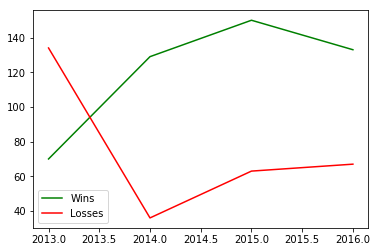

In [12]:
# Create a list of the years that we will use as our x axis


# Plot our line that will be used to track a wrestler's wins over the years


# Plot our line that will be used to track a wrestler's losses over the years


# Place a legend on the chart in what matplotlib believes to be the "best" location



# Print our chart to the screen